In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K

In [3]:
ann_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/"
img_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/"

In [4]:
img=[img_DIR+i for i in os.listdir(img_DIR)] 
ann=[ann_DIR+i for i in os.listdir(ann_DIR)] 

In [5]:
img[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png'

In [6]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [25]:
def draw_contour(img,file):  
    with open(file) as f:
        data = json.load(f)
    ext=data['objects'][0]['points']['exterior'][0]
    xt=data['objects'][0]['points']['exterior'][0][0]
    yt=data['objects'][0]['points']['exterior'][0][1]
    xl=data['objects'][0]['points']['exterior'][1][0]
    yl=data['objects'][0]['points']['exterior'][1][1]
    im = np.array(Image.open(img), dtype=np.uint8)

    # Create figure and axes

    fig,ax = plt.subplots(1)

    height=abs(yt-yl)
    width=abs(xt-xl)
    # Display the image
    ax.imshow(im,cmap='gray')

    # Create a Rectangle patch
    rect = patches.Rectangle(ext,width,height,linewidth=1,edgecolor='r',facecolor='none')
    # [26.0, 43.0], [101.0, 61.0]
    # Add the patch to the Axes
    ax.add_patch(rect)

    return plt.show()

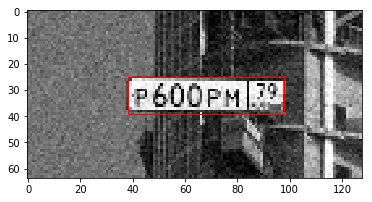

In [28]:
draw_contour(img[10],ann[10])